# Importing Libraries

In [1]:
from mimic.mimic import MIMIC, MIMICManipulations
from utils.util import generic_utils
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
generic_util_instance = generic_utils()

# Load Data

In [3]:
# Load in csv file as a dataframe
df = pd.read_csv('./dataset/ch_02_end_to_end_ml.csv')

/var/folders/sc/s09gg_md25979wgd9x6v6ksm0000gn/T/ipykernel_89019/2652801693.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/ch_02_end_to_end_ml.csv')


In [4]:
# Display first five rows of df
df.head()

,subject_id,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,...,priority,drg_type,drg_code,drug,route,org_name,test_name,quantity,ab_name,curr_service
0,10000019.0,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,0,1.968056,...,STAT,HCFA,795.0,Vaccine Book,IM,NaN,"Blood Culture, Routine",NaN,NaN,NB
1,10000032.0,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2.222222,...,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,NaN,EPSTEIN-BARR VIRUS VCA-IgG AB,NaN,NaN,MED
2,10000044.0,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,ASIAN,0,1.865278,...,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,FECAL CULTURE,NaN,NaN,NB
3,10000068.0,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
4,10000074.0,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,0,4.109722,...,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,NaN,NaN,NaN,NB


In [5]:
df.columns 

Index(['subject_id', 'admission_type', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status',
       'ethnicity', 'hospital_expire_flag', 'los_admission', 'gender',
       'anchor_age', 'eventtype', 'careunit', 'diagnosis_icd_code',
       'procedures_icd_code', 'value', 'flag', 'priority', 'drg_type',
       'drg_code', 'drug', 'route', 'org_name', 'test_name', 'quantity',
       'ab_name', 'curr_service'],
      dtype='object')

In [6]:
df.shape

(256796, 28)

# Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256796 entries, 0 to 256795
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            256796 non-null  float64
 1   admission_type        256796 non-null  object 
 2   admission_location    196392 non-null  object 
 3   discharge_location    177537 non-null  object 
 4   insurance             256796 non-null  object 
 5   language              256796 non-null  object 
 6   marital_status        193336 non-null  object 
 7   ethnicity             256796 non-null  object 
 8   hospital_expire_flag  256796 non-null  int64  
 9   los_admission         256796 non-null  float64
 10  gender                256796 non-null  object 
 11  anchor_age            256796 non-null  int64  
 12  eventtype             256796 non-null  object 
 13  careunit              793 non-null     object 
 14  diagnosis_icd_code    255024 non-null  object 
 15  

In [8]:
# Stat summary of numerical data
df.describe()

,subject_id,hospital_expire_flag,los_admission,anchor_age,drg_code
count,2.567960e+05,256796.000000,256796.000000,256796.000000,216865.000000
mean,1.501224e+07,0.020705,4.040955,42.288708,552.191253
std,2.885679e+06,0.142396,7.634195,29.397485,274.933987
min,1.000002e+07,0.000000,0.000694,0.000000,1.000000
25%,1.251287e+07,0.000000,1.019444,19.000000,308.000000
50%,1.501818e+07,0.000000,2.240972,47.000000,621.000000
75%,1.751089e+07,0.000000,4.142361,66.000000,795.000000
max,1.999999e+07,1.000000,377.026389,91.000000,999.000000


In [9]:
# df datatypes
df.dtypes

subject_id              float64
admission_type           object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
ethnicity                object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
careunit                 object
diagnosis_icd_code       object
procedures_icd_code      object
value                    object
flag                     object
priority                 object
drg_type                 object
drg_code                float64
drug                     object
route                    object
org_name                 object
test_name                object
quantity                 object
ab_name                  object
curr_service             object
dtype: object

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

In [10]:
# Drop subject_id and quantity columns 
df.drop(['subject_id', 'quantity', 'diagnosis_icd_code', 'procedures_icd_code', 'value'], axis=1, inplace = True)
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,gender,...,flag,priority,drg_type,drg_code,drug,route,org_name,test_name,ab_name,curr_service
0,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,0,1.968056,M,...,NaN,STAT,HCFA,795.0,Vaccine Book,IM,NaN,"Blood Culture, Routine",NaN,NB
1,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2.222222,F,...,abnormal,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,NaN,EPSTEIN-BARR VIRUS VCA-IgG AB,NaN,MED
2,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,ASIAN,0,1.865278,F,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,FECAL CULTURE,NaN,NB
3,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
4,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,0,4.109722,M,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,NaN,NaN,NB


### Admission Type Column

In [11]:
# Count of different admission types
df.admission_type.value_counts()

ELECTIVE                       63763
EU OBSERVATION                 61249
EW EMER.                       53133
URGENT                         21395
OBSERVATION ADMIT              17905
SURGICAL SAME DAY ADMISSION    17298
DIRECT OBSERVATION             13208
AMBULATORY OBSERVATION          4877
DIRECT EMER.                    3968
Name: admission_type, dtype: int64

In [12]:
# Check if admission type column has NaNs
df.admission_type.isna().sum()

0

### Admission Location Column

In [13]:
# Count of different admission locations
df.admission_location.value_counts()

EMERGENCY ROOM                            104535
PHYSICIAN REFERRAL                         51316
TRANSFER FROM HOSPITAL                     21364
WALK-IN/SELF REFERRAL                       7026
PROCEDURE SITE                              4064
PACU                                        3367
CLINIC REFERRAL                             3050
TRANSFER FROM SKILLED NURSING FACILITY      1105
INTERNAL TRANSFER TO OR FROM PSYCH           250
INFORMATION NOT AVAILABLE                    222
AMBULATORY SURGERY TRANSFER                   93
Name: admission_location, dtype: int64

In [14]:
# Check if admission locations column has NaNs
df.admission_location.isna().sum()

60404

In [15]:
# Replace NaNs in admission location column with "Other"
df = generic_util_instance.replace_nan(df, 'admission_location', 'Other')
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,gender,...,flag,priority,drg_type,drg_code,drug,route,org_name,test_name,ab_name,curr_service
0,ELECTIVE,Other,HOME,Other,ENGLISH,NaN,WHITE,0,1.968056,M,...,NaN,STAT,HCFA,795.0,Vaccine Book,IM,NaN,"Blood Culture, Routine",NaN,NB
1,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2.222222,F,...,abnormal,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,NaN,EPSTEIN-BARR VIRUS VCA-IgG AB,NaN,MED
2,ELECTIVE,Other,HOME,Other,ENGLISH,NaN,ASIAN,0,1.865278,F,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,FECAL CULTURE,NaN,NB
3,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
4,ELECTIVE,Other,HOME,Other,ENGLISH,NaN,WHITE,0,4.109722,M,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,NaN,NaN,NB


In [16]:
df.shape

(256796, 23)

In [17]:
# Check if admission locations column has NaNs
df.admission_location.isna().sum()

0

In [18]:
# Replace values with less than 3000 samples with "Other"
df = generic_util_instance.replace_column_value(df, 'admission_location', 3000, 'Other')
df.admission_location.value_counts()

EMERGENCY ROOM            104535
Other                      62074
PHYSICIAN REFERRAL         51316
TRANSFER FROM HOSPITAL     21364
WALK-IN/SELF REFERRAL       7026
PROCEDURE SITE              4064
PACU                        3367
CLINIC REFERRAL             3050
Name: admission_location, dtype: int64

### Discharge Location

In [19]:
# Check if discharge locations column has NaNs
df.discharge_location.isna().sum()

79259

In [20]:
# Count of discharge admission locations
df.discharge_location.value_counts()

HOME                            115951
HOME HEALTH CARE                 27479
SKILLED NURSING FACILITY         15246
REHAB                             5272
DIED                              5184
ACUTE HOSPITAL                    2489
CHRONIC/LONG TERM ACUTE CARE      2286
HOSPICE                           1342
PSYCH FACILITY                     823
AGAINST ADVICE                     681
OTHER FACILITY                     469
ASSISTED LIVING                    175
HEALTHCARE FACILITY                140
Name: discharge_location, dtype: int64

In [21]:
# Replace NaNs and values with less than 2000 samples with "Other"
df = generic_util_instance.replace_nan(df, 'discharge_location', 'Other')
df = generic_util_instance.replace_column_value(df, 'discharge_location', 2000, 'Other')
df.discharge_location.value_counts()

HOME                            115951
Other                            82889
HOME HEALTH CARE                 27479
SKILLED NURSING FACILITY         15246
REHAB                             5272
DIED                              5184
ACUTE HOSPITAL                    2489
CHRONIC/LONG TERM ACUTE CARE      2286
Name: discharge_location, dtype: int64

### Insurance

In [22]:
df.insurance.value_counts()

Other       173946
Medicare     60100
Medicaid     22750
Name: insurance, dtype: int64

In [23]:
df.insurance.isna().sum()

0

### Language

In [24]:
df.language.isna().sum()

0

In [25]:
df.language.value_counts()

ENGLISH    237922
?           18874
Name: language, dtype: int64

In [26]:
# Replace values with less than 23000 samples with "Other"
df = generic_util_instance.replace_column_value(df, 'language', 23000, 'Other')
df.language.value_counts()

ENGLISH    237922
Other       18874
Name: language, dtype: int64

### Marital Status

In [27]:
df.marital_status.isna().sum()

63460

In [28]:
df.marital_status.value_counts()

MARRIED     84862
SINGLE      78341
WIDOWED     17862
DIVORCED    12271
Name: marital_status, dtype: int64

In [29]:
# Replace NaNs with "Other"
df = generic_util_instance.replace_nan(df, 'marital_status', 'Other')
df.marital_status.value_counts()

MARRIED     84862
SINGLE      78341
Other       63460
WIDOWED     17862
DIVORCED    12271
Name: marital_status, dtype: int64

### Ethnicity

In [30]:
df.ethnicity.isna().sum()

0

In [31]:
df.ethnicity.value_counts()

WHITE                            159432
BLACK/AFRICAN AMERICAN            31179
ASIAN                             16522
UNKNOWN                           16443
OTHER                             15854
HISPANIC/LATINO                   13334
UNABLE TO OBTAIN                   3084
AMERICAN INDIAN/ALASKA NATIVE       948
Name: ethnicity, dtype: int64

In [32]:
# Replace values with less than 4500 samples with "Other"
df = generic_util_instance.replace_column_value(df, 'ethnicity', 4500, 'OTHER')
df.ethnicity.value_counts()

WHITE                     159432
BLACK/AFRICAN AMERICAN     31179
OTHER                      19886
ASIAN                      16522
UNKNOWN                    16443
HISPANIC/LATINO            13334
Name: ethnicity, dtype: int64

### Hospital Expire Flag

In [33]:
df.hospital_expire_flag.value_counts()

0    251479
1      5317
Name: hospital_expire_flag, dtype: int64

In [34]:
df.hospital_expire_flag.isna().sum()

0

### Gender 

In [35]:
df.gender.value_counts()

F    133426
M    123370
Name: gender, dtype: int64

In [36]:
df.gender.isna().sum()

0

### Anchor Age

In [37]:
df.anchor_age.isna().sum()

0

### Event Type 

In [38]:
df.eventtype.isna().sum()

0

In [39]:
df.eventtype.value_counts()

discharge    227823
admit         24732
transfer       4131
ED              110
Name: eventtype, dtype: int64

### Care Unit 

In [40]:
df.careunit.isna().sum()

256003

In [41]:
df.careunit.value_counts()

Medicine                               197
PACU                                   138
Emergency Department                   110
Neurology                               64
Med/Surg                                60
Vascular                                53
Labor & Delivery                        35
Nursery - Well Babies                   23
Surgery                                 17
Surgery/Trauma                          15
Cardiac Surgery                         10
Med/Surg/GYN                             9
Transplant                               9
Medicine/Cardiology                      8
Med/Surg/Trauma                          8
Trauma SICU (TSICU)                      4
Emergency Department Observation         4
Coronary Care Unit (CCU)                 3
Special Care Nursery (SCN)               3
Observation                              3
Hematology/Oncology                      3
Medical/Surgical (Gynecology)            3
Obstetrics Postpartum                    2
Thoracic Su

In [42]:
# Careunit has lot of nans, so drop entire column
df.drop('careunit', axis=1, inplace = True)

In [43]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,gender,...,flag,priority,drg_type,drg_code,drug,route,org_name,test_name,ab_name,curr_service
0,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0,1.968056,M,...,NaN,STAT,HCFA,795.0,Vaccine Book,IM,NaN,"Blood Culture, Routine",NaN,NB
1,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2.222222,F,...,abnormal,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,NaN,EPSTEIN-BARR VIRUS VCA-IgG AB,NaN,MED
2,ELECTIVE,Other,HOME,Other,ENGLISH,Other,ASIAN,0,1.865278,F,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,FECAL CULTURE,NaN,NB
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
4,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0,4.109722,M,...,NaN,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,NaN,NaN,NaN,NB


In [44]:
#df.diagnosis_icd_code.isna().sum()

In [45]:
# df = generic_util_instance.replace_nan(df, 'diagnosis_icd_code', 'ICD_DIAGNOSIS')
# df.diagnosis_icd_code.isna().sum()

In [46]:
# df.procedures_icd_code.isna().sum()

In [47]:
# df = generic_util_instance.replace_nan(df, 'procedures_icd_code', 'ICD_PROCEDURES')
# df.procedures_icd_code.isna().sum()

In [48]:
#df.value.isna().sum()

In [49]:
# #Fill value with 0.
# df = generic_util_instance.replace_nan(df, 'value', 0.0)
# df.value.isna().sum()

### Flag

In [50]:
df.flag.isna().sum()

227037

In [51]:
df.flag.value_counts()

abnormal    29759
Name: flag, dtype: int64

In [52]:
# Replace NaNs with "normal"
df = generic_util_instance.replace_nan(df, 'flag', 'normal')
df.flag.value_counts()

normal      227037
abnormal     29759
Name: flag, dtype: int64

### Priority 

In [53]:
df.priority.isna().sum()

22086

In [54]:
df.priority.value_counts()

STAT       171757
ROUTINE     62953
Name: priority, dtype: int64

In [55]:
df = generic_util_instance.replace_nan(df, 'priority', 'OTHER')
df.priority.value_counts()

STAT       171757
ROUTINE     62953
OTHER       22086
Name: priority, dtype: int64

In [56]:
df.columns

Index(['admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'ethnicity',
       'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age',
       'eventtype', 'flag', 'priority', 'drg_type', 'drg_code', 'drug',
       'route', 'org_name', 'test_name', 'ab_name', 'curr_service'],
      dtype='object')

### Drug Type

In [57]:
df.drg_type.isna().sum()

39931

In [58]:
df.drg_type.value_counts().to_dict()

{'HCFA': 216865}

In [59]:
# Replace NaNs with "Other"
df = generic_util_instance.replace_nan(df, 'drg_type', 'OTHER')
df.drg_type.value_counts()

HCFA     216865
OTHER     39931
Name: drg_type, dtype: int64

### Drug Code 

In [60]:
df.drg_code.isna().sum()

39931

In [61]:
df.drg_code.value_counts().to_dict()

{795.0: 38175,
 794.0: 11496,
 775.0: 4758,
 792.0: 3737,
 885.0: 3278,
 392.0: 2888,
 793.0: 2444,
 470.0: 2435,
 871.0: 2310,
 789.0: 1994,
 236.0: 1986,
 247.0: 1955,
 790.0: 1774,
 603.0: 1736,
 765.0: 1735,
 766.0: 1624,
 65.0: 1599,
 64.0: 1597,
 287.0: 1365,
 774.0: 1365,
 494.0: 1357,
 460.0: 1281,
 552.0: 1280,
 101.0: 1189,
 220.0: 1180,
 791.0: 1148,
 378.0: 1140,
 473.0: 1138,
 312.0: 1056,
 25.0: 1048,
 690.0: 984,
 66.0: 977,
 330.0: 967,
 897.0: 930,
 743.0: 925,
 683.0: 922,
 491.0: 898,
 627.0: 897,
 313.0: 870,
 641.0: 843,
 194.0: 842,
 27.0: 838,
 481.0: 833,
 621.0: 828,
 853.0: 811,
 234.0: 790,
 3.0: 789,
 176.0: 753,
 291.0: 753,
 87.0: 752,
 310.0: 737,
 280.0: 708,
 872.0: 694,
 343.0: 677,
 419.0: 676,
 219.0: 675,
 445.0: 650,
 917.0: 649,
 454.0: 638,
 292.0: 637,
 781.0: 625,
 331.0: 619,
 246.0: 612,
 918.0: 607,
 208.0: 602,
 86.0: 601,
 682.0: 588,
 193.0: 582,
 493.0: 567,
 881.0: 564,
 251.0: 563,
 581.0: 557,
 444.0: 557,
 309.0: 552,
 482.0: 550,
 4

In [62]:
# Replace NaNs with 0
df = generic_util_instance.replace_nan(df, 'drg_code', 0.0)
df.drg_code.isna().sum()

0

### Drug 

In [63]:
df.drug.isna().sum()

24774

In [64]:
df.drug.value_counts().to_dict()

{'Erythromycin 0.5% Ophth Oint': 52253,
 'Sodium Chloride 0.9%  Flush': 32575,
 'Influenza Vaccine Quadrivalent': 17229,
 'Influenza Virus Vaccine': 11106,
 'Aspirin': 5148,
 'Heparin': 4488,
 '0.9% Sodium Chloride': 4363,
 'Iso-Osmotic Dextrose': 4020,
 'PNEUMOcoccal 23-valent polysaccharide vaccine': 3930,
 'Bag': 3912,
 'Acetaminophen': 3522,
 'Pneumococcal Vac Polyvalent': 3078,
 '5% Dextrose': 3052,
 'Senna': 2804,
 'Bisacodyl': 2636,
 'Docusate Sodium': 2630,
 '1/2 NS': 2492,
 'Insulin': 1951,
 'Multivitamins': 1875,
 'Aspirin EC': 1750,
 'Naloxone': 1748,
 'D10W': 1702,
 'Levothyroxine Sodium': 1688,
 'NS': 1631,
 'SW': 1523,
 'Glucagon': 1453,
 'Vial': 1349,
 'Lisinopril': 1294,
 'Ondansetron': 1273,
 'Omeprazole': 1202,
 'Atorvastatin': 1171,
 'Lactated Ringers': 1148,
 '0.45% Sodium Chloride': 1125,
 'Atenolol': 1098,
 'D5 1/2NS': 1034,
 'LR': 1001,
 'Sodium Chloride 0.9%': 998,
 'Simvastatin': 908,
 'Amlodipine': 900,
 'Hepatitis B Vaccine': 861,
 'D5W': 856,
 'Morphine Sulf

In [65]:
df = generic_util_instance.replace_nan(df, 'drug', 'None')
df.drug.isna().sum()

0

In [66]:
df = generic_util_instance.replace_column_value(df, 'drug', 3000, 'Other')
df.drug.value_counts()

Other                                            83346
Erythromycin 0.5% Ophth Oint                     52253
Sodium Chloride 0.9%  Flush                      32575
None                                             24774
Influenza Vaccine Quadrivalent                   17229
Influenza Virus Vaccine                          11106
Aspirin                                           5148
Heparin                                           4488
0.9% Sodium Chloride                              4363
Iso-Osmotic Dextrose                              4020
PNEUMOcoccal 23-valent polysaccharide vaccine     3930
Bag                                               3912
Acetaminophen                                     3522
Pneumococcal Vac Polyvalent                       3078
5% Dextrose                                       3052
Name: drug, dtype: int64

### Route 

In [67]:
df.route.isna().sum()

24984

In [68]:
df.route.value_counts().to_dict()

{'IV': 75633,
 'BOTH EYES': 52349,
 'IM': 38930,
 'PO': 30329,
 'PO/NG': 19024,
 'SC': 6960,
 'IV DRIP': 2961,
 'PIV': 993,
 'TD': 827,
 'IH': 530,
 'ORAL': 495,
 'TP': 456,
 'IVPCA': 278,
 'ED': 275,
 'NU': 254,
 'PR': 245,
 'NG': 190,
 'IV BOLUS': 112,
 'ID': 105,
 'DIALYS': 84,
 'DLUVC': 82,
 'UVC': 65,
 'PB': 65,
 'REPLACE': 62,
 'SL': 60,
 'OU': 51,
 'ET': 51,
 'BUCCAL': 48,
 'PERIPHNERVE': 34,
 'NEB': 33,
 'VG': 31,
 'LEFT EYE': 29,
 'PL': 29,
 'RIGHT EYE': 24,
 'IT': 23,
 'SUBCUT': 21,
 'DWELL': 15,
 'IP': 14,
 'NAS': 7,
 'IN': 4,
 'UAC': 3,
 'OD': 3,
 'OS': 3,
 'IMPELLA': 3,
 'IVT': 2,
 'LUMBAR PLEXUS': 2,
 'IR': 2,
 'INHALATION': 2,
 'PAL': 1,
 'LEFT EAR': 1,
 'BOTH EARS': 1,
 'PO OR ENTERAL TUBE': 1,
 'PICC': 1,
 'IA': 1,
 'INTRAVITREAL': 1,
 'G TUBE': 1,
 'LOCK': 1,
 'TT': 1,
 'AD': 1,
 'TRANSDERMAL': 1,
 'IRR': 1,
 'OG': 1}

In [69]:
# Replace NaNs with "None"
df = generic_util_instance.replace_nan(df, 'route', 'None')
df.route.isna().sum()

0

In [70]:
df = generic_util_instance.replace_column_value(df, 'route', 2500, 'Other')
df.route.value_counts()

IV           75633
BOTH EYES    52349
IM           38930
PO           30329
None         24984
PO/NG        19024
SC            6960
Other         5626
IV DRIP       2961
Name: route, dtype: int64

### Organism name 

In [71]:
df.org_name.isna().sum()

190676

In [72]:
df.org_name.value_counts().to_dict()

{'ESCHERICHIA COLI': 10847,
 'CANCELLED': 9466,
 'STAPH AUREUS COAG +': 7036,
 'GRAM POSITIVE BACTERIA': 4982,
 'YEAST': 4657,
 'STAPHYLOCOCCUS, COAGULASE NEGATIVE': 4215,
 'ENTEROCOCCUS SP.': 2879,
 'KLEBSIELLA PNEUMONIAE': 2330,
 'POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS': 1543,
 'POSITIVE FOR GROUP B BETA STREPTOCOCCI': 1529,
 'BETA STREPTOCOCCUS GROUP B': 1325,
 'PROTEUS MIRABILIS': 1103,
 'PSEUDOMONAS AERUGINOSA': 1031,
 'CORYNEBACTERIUM SPECIES (DIPHTHEROIDS)': 923,
 'MIXED BACTERIAL FLORA': 771,
 'VIRIDANS STREPTOCOCCI': 621,
 'BACTEROIDES FRAGILIS GROUP': 487,
 'PRESUMPTIVE GARDNERELLA VAGINALIS': 476,
 'BETA STREPTOCOCCUS GROUP A': 443,
 'GRAM NEGATIVE ROD(S)': 404,
 'KLEBSIELLA OXYTOCA': 357,
 'LACTOBACILLUS SPECIES': 341,
 'STREPTOCOCCUS ANGINOSUS (MILLERI) GROUP': 295,
 'SERRATIA MARCESCENS': 290,
 'ENTEROBACTER CLOACAE COMPLEX': 288,
 'STAPHYLOCOCCUS EPIDERMIDIS': 278,
 'ENTEROBACTER AEROGENES': 276,
 'GRAM POSITIVE COCCUS(COCCI)': 253,
 'PROPIONIBACTERIUM ACNES': 2

In [73]:
df = generic_util_instance.replace_nan(df, 'org_name', 'None')
df = generic_util_instance.replace_column_value(df, 'org_name', 1500, 'Other')
df.org_name.value_counts()

None                                               190676
Other                                               16636
ESCHERICHIA COLI                                    10847
CANCELLED                                            9466
STAPH AUREUS COAG +                                  7036
GRAM POSITIVE BACTERIA                               4982
YEAST                                                4657
STAPHYLOCOCCUS, COAGULASE NEGATIVE                   4215
ENTEROCOCCUS SP.                                     2879
KLEBSIELLA PNEUMONIAE                                2330
POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS      1543
POSITIVE FOR GROUP B BETA STREPTOCOCCI               1529
Name: org_name, dtype: int64

### Test Name 

In [74]:
df.test_name.isna().sum()

83079

In [75]:
df.test_name.value_counts().to_dict()

{'URINE CULTURE': 58901,
 'Blood Culture, Routine': 34109,
 'MRSA SCREEN': 23028,
 'Blood Culture, Neonate': 11207,
 'WOUND CULTURE': 6335,
 'Staph aureus Screen': 4438,
 'RAPID PLASMA REAGIN TEST': 3576,
 'GRAM STAIN': 2815,
 'FLUID CULTURE': 2089,
 'Chlamydia trachomatis, Nucleic Acid Probe, with Amplification': 1843,
 'HELICOBACTER PYLORI ANTIBODY TEST': 1759,
 'R/O GROUP B BETA STREP': 1629,
 'YEAST VAGINITIS CULTURE': 1508,
 'FUNGAL CULTURE': 1448,
 'ANAEROBIC CULTURE': 1280,
 'C. difficile DNA amplification assay': 1125,
 'RESPIRATORY CULTURE': 1099,
 'TISSUE': 1083,
 'FECAL CULTURE': 1052,
 'LYME SEROLOGY': 979,
 'THROAT - R/O BETA STREP': 943,
 'NEISSERIA GONORRHOEAE (GC), NUCLEIC ACID PROBE, WITH AMPLIFICATION': 806,
 'CHROMOSOME ANALYSIS-BONE MARROW': 675,
 'VIRAL CULTURE: R/O CYTOMEGALOVIRUS': 668,
 'Staph aureus Preop PCR': 586,
 'VARICELLA-ZOSTER IgG SEROLOGY': 494,
 'VIRAL CULTURE: R/O HERPES SIMPLEX VIRUS': 487,
 'R/O VANCOMYCIN RESISTANT ENTEROCOCCUS': 372,
 'OVA + PARA

In [76]:
df = generic_util_instance.replace_nan(df, 'test_name', 'None')
df.test_name.isna().sum()

0

In [77]:
df = generic_util_instance.replace_column_value(df, 'test_name', 2000, 'Other')
df.test_name.value_counts()

None                        83079
URINE CULTURE               58901
Blood Culture, Routine      34109
Other                       27219
MRSA SCREEN                 23028
Blood Culture, Neonate      11207
WOUND CULTURE                6335
Staph aureus Screen          4438
RAPID PLASMA REAGIN TEST     3576
GRAM STAIN                   2815
FLUID CULTURE                2089
Name: test_name, dtype: int64

### Ab Name 

In [78]:
df.ab_name.value_counts()

AMPICILLIN              12473
ERYTHROMYCIN             6144
CEFAZOLIN                2465
TRIMETHOPRIM/SULFA       2124
PENICILLIN G             1962
GENTAMICIN               1157
NITROFURANTOIN            473
VANCOMYCIN                327
TOBRAMYCIN                224
CEFEPIME                  215
CEFTRIAXONE               210
CEFTAZIDIME               200
MEROPENEM                 183
CLINDAMYCIN               181
CIPROFLOXACIN             177
PIPERACILLIN/TAZO         138
TETRACYCLINE              105
AMPICILLIN/SULBACTAM      101
OXACILLIN                  85
LEVOFLOXACIN               81
PIPERACILLIN               26
RIFAMPIN                   25
CEFUROXIME                 24
DAPTOMYCIN                 14
AMIKACIN                   12
LINEZOLID                   8
IMIPENEM                    2
Name: ab_name, dtype: int64

In [79]:
df.ab_name.isna().sum()

227660

In [80]:
df = generic_util_instance.replace_nan(df, 'ab_name', 'None')
df.ab_name.isna().sum()

0

In [81]:
df = generic_util_instance.replace_column_value(df, 'ab_name', 1000, 'Other')
df.ab_name.value_counts()

None                  227660
AMPICILLIN             12473
ERYTHROMYCIN            6144
Other                   2811
CEFAZOLIN               2465
TRIMETHOPRIM/SULFA      2124
PENICILLIN G            1962
GENTAMICIN              1157
Name: ab_name, dtype: int64

### Curr Service 

In [82]:
df.curr_service.isna().sum()

1

In [83]:
df.curr_service.value_counts().to_dict()

{'MED': 88405,
 'NB': 59972,
 'SURG': 17386,
 'CMED': 15344,
 'ORTHO': 13681,
 'OBS': 10748,
 'NMED': 10447,
 'NSURG': 7448,
 'CSURG': 5621,
 'TRAUM': 5071,
 'OMED': 4948,
 'VSURG': 3452,
 'GYN': 3336,
 'PSYCH': 2545,
 'PSURG': 2534,
 'GU': 2415,
 'TSURG': 2019,
 'NBB': 840,
 'ENT': 553,
 'DENT': 20,
 'EYE': 10}

In [84]:
df = generic_util_instance.replace_nan(df, 'curr_service', 'Other')
df = generic_util_instance.replace_column_value(df, 'curr_service', 1000, 'Other')
df.curr_service.value_counts()

MED      88405
NB       59972
SURG     17386
CMED     15344
ORTHO    13681
OBS      10748
NMED     10447
NSURG     7448
CSURG     5621
TRAUM     5071
OMED      4948
VSURG     3452
GYN       3336
PSYCH     2545
PSURG     2534
GU        2415
TSURG     2019
Other     1424
Name: curr_service, dtype: int64

In [85]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,los_admission,gender,...,flag,priority,drg_type,drg_code,drug,route,org_name,test_name,ab_name,curr_service
0,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0,1.968056,M,...,normal,STAT,HCFA,795.0,Other,IM,None,"Blood Culture, Routine",None,NB
1,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,2.222222,F,...,abnormal,ROUTINE,HCFA,442.0,Influenza Vaccine Quadrivalent,IM,None,Other,None,MED
2,ELECTIVE,Other,HOME,Other,ENGLISH,Other,ASIAN,0,1.865278,F,...,normal,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,None,Other,None,NB
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,normal,OTHER,OTHER,0.0,None,None,None,None,None,MED
4,ELECTIVE,Other,HOME,Other,ENGLISH,Other,WHITE,0,4.109722,M,...,normal,STAT,HCFA,795.0,Erythromycin 0.5% Ophth Oint,BOTH EYES,None,None,None,NB


In [86]:
df.dtypes

admission_type           object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
ethnicity                object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
flag                     object
priority                 object
drg_type                 object
drg_code                float64
drug                     object
route                    object
org_name                 object
test_name                object
ab_name                  object
curr_service             object
dtype: object

In [87]:
# Convert data type to float64 or string
for column in df.columns:
    if column in ['hospital_expire_flag', 'los_admission', 'anchor_age', 'drg_code']:
        try:
            df[column] = df[column].astype('float64')
        except Exception as ex:
            pass
    else:
        df[column] = df[column].astype('string')

In [88]:
df.dtypes

admission_type           string
admission_location       string
discharge_location       string
insurance                string
language                 string
marital_status           string
ethnicity                string
hospital_expire_flag    float64
los_admission           float64
gender                   string
anchor_age              float64
eventtype                string
flag                     string
priority                 string
drg_type                 string
drg_code                float64
drug                     string
route                    string
org_name                 string
test_name                string
ab_name                  string
curr_service             string
dtype: object

# Correlations

In [89]:
corr_matrix = df.corr()

In [90]:
corr_matrix

,hospital_expire_flag,los_admission,anchor_age,drg_code
hospital_expire_flag,1.000000,0.088975,0.130230,-0.027762
los_admission,0.088975,1.000000,-0.010459,0.094004
anchor_age,0.130230,-0.010459,1.000000,-0.493545
drg_code,-0.027762,0.094004,-0.493545,1.000000


Since majority of the columns are categorical we need to compute `cramers_v` or `theils_u`. Since we want to check corelation with `los_admission` we need to calculate `corelation ratio`.

## TO-DO:
- Correlation Coefficient

# Handling Text and Categorical Attributes

In [91]:
# Define new variable for "admission_type" column
admission_type = df[["admission_type"]]
admission_type.head()

,admission_type
0,ELECTIVE
1,EW EMER.
2,ELECTIVE
3,EU OBSERVATION
4,ELECTIVE


In [92]:
# Convert "admission_type" to numbers so that it's easier to work with
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
admission_type_encoded = ordinal_encoder.fit_transform(admission_type)
admission_type_encoded[:10]

array([[3.],
       [5.],
       [3.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [4.]])

In [93]:
# Get list of unique admission types 
ordinal_encoder.categories_

[array(['AMBULATORY OBSERVATION', 'DIRECT EMER.', 'DIRECT OBSERVATION',
        'ELECTIVE', 'EU OBSERVATION', 'EW EMER.', 'OBSERVATION ADMIT',
        'SURGICAL SAME DAY ADMISSION', 'URGENT'], dtype=object)]

In [94]:
# Create one-hot encoding for admission_type
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
admission_type_1hot = cat_encoder.fit_transform(admission_type)
admission_type_1hot

<256796x9 sparse matrix of type '<class 'numpy.float64'>'
	with 256796 stored elements in Compressed Sparse Row format>

In [95]:
# Convert sparse matrix of admission_type to a NumPy array
admission_type_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
# Get list of unique admission types
cat_encoder.categories_

[array(['AMBULATORY OBSERVATION', 'DIRECT EMER.', 'DIRECT OBSERVATION',
        'ELECTIVE', 'EU OBSERVATION', 'EW EMER.', 'OBSERVATION ADMIT',
        'SURGICAL SAME DAY ADMISSION', 'URGENT'], dtype=object)]

# Transformation Pipelines

In [97]:
# List categorical columns
categorical_columns = df.select_dtypes(include=['string']).columns.tolist()
categorical_columns

['admission_type',
 'admission_location',
 'discharge_location',
 'insurance',
 'language',
 'marital_status',
 'ethnicity',
 'gender',
 'eventtype',
 'flag',
 'priority',
 'drg_type',
 'drug',
 'route',
 'org_name',
 'test_name',
 'ab_name',
 'curr_service']

In [98]:
# List numerical columns
numerical_columns = [df.select_dtypes(exclude=['string']).columns.tolist()[2]]
numerical_columns

['anchor_age']

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [100]:
# Define pipeline for numerical column transformation
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

In [101]:
from sklearn.compose import ColumnTransformer

num_attribs = numerical_columns #list of numerical column names
cat_attribs = categorical_columns #list of categorical column names

# Construct ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

In [102]:
# Apply pipeline to data
data_prepared = full_pipeline.fit_transform(df)

# Discover and Visualize Data to Gain Insights

In [103]:
# Convert to dataframe 
df_prepared = pd.DataFrame(data_prepared, columns= num_attribs + cat_attribs)

In [104]:
# Add back los_admission column
los_admission = df["los_admission"]
df_prepared.insert(0, "los_admission", los_admission)

In [105]:
df_prepared.head()

,los_admission,anchor_age,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,gender,eventtype,flag,priority,drg_type,drug,route,org_name,test_name,ab_name,curr_service
0,1.968056,-1.438517,3.0,2.0,3.0,2.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0,0.0,11.0,1.0,5.0,1.0,4.0,5.0
1,2.222222,0.330345,5.0,1.0,3.0,0.0,0.0,4.0,5.0,0.0,2.0,0.0,1.0,0.0,7.0,1.0,5.0,6.0,4.0,4.0
2,1.865278,-1.438517,3.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,5.0,0.0,5.0,6.0,4.0,5.0
3,0.298611,-0.792202,4.0,1.0,5.0,2.0,0.0,3.0,5.0,0.0,2.0,1.0,0.0,1.0,10.0,4.0,5.0,5.0,4.0,4.0
4,4.109722,-1.438517,3.0,2.0,3.0,2.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0,0.0,5.0,0.0,5.0,5.0,4.0,5.0


array([[<AxesSubplot:xlabel='admission_type', ylabel='admission_type'>,
        <AxesSubplot:xlabel='insurance', ylabel='admission_type'>,
        <AxesSubplot:xlabel='ethnicity', ylabel='admission_type'>],
       [<AxesSubplot:xlabel='admission_type', ylabel='insurance'>,
        <AxesSubplot:xlabel='insurance', ylabel='insurance'>,
        <AxesSubplot:xlabel='ethnicity', ylabel='insurance'>],
       [<AxesSubplot:xlabel='admission_type', ylabel='ethnicity'>,
        <AxesSubplot:xlabel='insurance', ylabel='ethnicity'>,
        <AxesSubplot:xlabel='ethnicity', ylabel='ethnicity'>]],
      dtype=object)

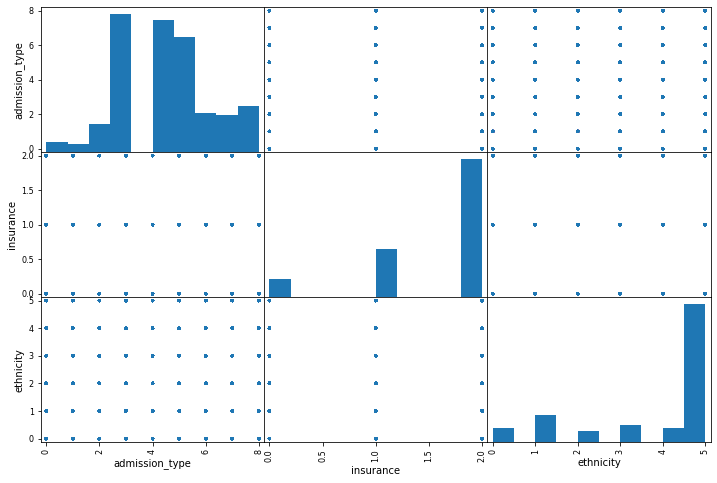

In [107]:
from pandas.plotting import scatter_matrix
attributes = ["admission_type", "insurance", "ethnicity"]
scatter_matrix(df_prepared[attributes],figsize=(12, 8))

# Create a Test Set

In [108]:
# Set random number generator seed
np.random.seed(42)

1.0    0.884114
0.0    0.115886
Name: flag, dtype: float64

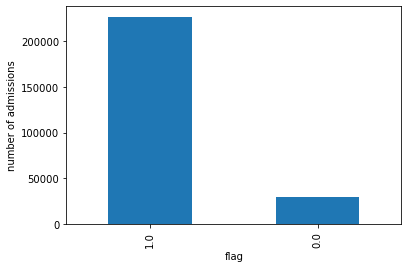

In [109]:
# Plot bar graph of "flag" variable 
df_prepared["flag"].value_counts().plot(kind='bar',xlabel='flag',ylabel='number of admissions')
# Get proportion of "flag" variable in dataset
df_prepared["flag"].value_counts() / len(df)

In [110]:
# Split data into training and test sets while stratifying based on "flag"
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["flag"]):
    strat_train_set = df_prepared.loc[train_index]
    strat_test_set = df_prepared.loc[test_index]

In [111]:
strat_train_set.head()

,los_admission,anchor_age,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,gender,eventtype,flag,priority,drg_type,drug,route,org_name,test_name,ab_name,curr_service
137475,0.670833,0.398378,2.0,4.0,5.0,2.0,0.0,1.0,5.0,1.0,2.0,1.0,2.0,1.0,10.0,4.0,6.0,6.0,4.0,4.0
81263,1.427083,-0.111871,7.0,4.0,3.0,2.0,0.0,1.0,5.0,0.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0,9.0,0.0,6.0
177320,1.872222,-1.438517,3.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0,5.0,0.0,5.0,5.0,4.0,5.0
58882,12.093750,0.534444,5.0,1.0,7.0,1.0,0.0,3.0,5.0,0.0,2.0,1.0,1.0,0.0,14.0,2.0,2.0,9.0,0.0,4.0
36550,3.619444,-1.438517,3.0,2.0,3.0,2.0,0.0,2.0,4.0,1.0,2.0,1.0,2.0,0.0,5.0,0.0,5.0,5.0,4.0,5.0


In [112]:
# Get proportion of "flag" variable in test set 
strat_test_set["flag"].value_counts() / len(strat_test_set)

1.0    0.884112
0.0    0.115888
Name: flag, dtype: float64

In [113]:
# Separate label from training set
train_set_X = strat_train_set.drop("los_admission", axis = 1)
train_set_y = strat_train_set["los_admission"]

test_set_X = strat_test_set.drop("los_admission", axis = 1)
test_set_y = strat_test_set["los_admission"]

In [114]:
# Apply transformation pipeline to training set
train_set_X_prepared = full_pipeline.fit_transform(train_set_X)

In [115]:
train_set_X_prepared.shape

(205436, 19)

In [116]:
train_set_X_prepared

array([[ 0.39909861,  2.        ,  4.        , ...,  6.        ,
         4.        ,  4.        ],
       [-0.11151772,  7.        ,  4.        , ...,  9.        ,
         0.        ,  6.        ],
       [-1.43912018,  3.        ,  2.        , ...,  5.        ,
         4.        ,  5.        ],
       ...,
       [-1.43912018,  3.        ,  2.        , ...,  5.        ,
         4.        ,  5.        ],
       [ 0.50122187,  5.        ,  1.        , ...,  6.        ,
         4.        ,  0.        ],
       [ 1.35224909,  4.        ,  1.        , ...,  1.        ,
         4.        ,  4.        ]])

In [117]:
# Apply transformation pipeline to testing set
X_test_prepared = full_pipeline.transform(test_set_X)

# Select and Train a Model

## Training and Evaluating on the Training Set

### Linear Regression

### Linear Regression

In [118]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg_instance = LinearRegression()
lin_reg_instance.fit(train_set_X_prepared, train_set_y)

LinearRegression()

In [119]:
some_data = train_set_X.iloc[:5]
some_labels = train_set_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions : {lin_reg_instance.predict(some_data_prepared)}")

Predictions : [0.4263162  6.26433204 3.69780975 5.8607392  4.06881992]


In [120]:
print(f"Labels : {some_labels}")

Labels : 137475     0.670833
81263      1.427083
177320     1.872222
58882     12.093750
36550      3.619444
Name: los_admission, dtype: float64


In [121]:
from sklearn.metrics import mean_squared_error

# measure regression model's RMSE
los_admission_predictions = lin_reg_instance.predict(train_set_X_prepared)
lin_mse = mean_squared_error(train_set_y, los_admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.399259062186099

In [122]:
# Measure regression model's mean absolute error
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_set_y, los_admission_predictions)
lin_mae

3.18672080955238

### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_instance = DecisionTreeRegressor(random_state=42)

In [124]:
# fit model
tree_reg_instance.fit(train_set_X_prepared, train_set_y)

DecisionTreeRegressor(random_state=42)

In [125]:
# measure decision tree model's RMSE
los_admission_predictions = tree_reg_instance.predict(train_set_X_prepared)
lin_mse = mean_squared_error(train_set_y, los_admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.6628540652101433

# Better Evaluation using Cross Validation

In [126]:
# 10-fold cross validation with decision tree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg_instance, train_set_X_prepared, train_set_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [127]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [7.27616918 8.21014594 8.59675297 7.07555482 7.77317663 7.98449479
 7.47812283 7.86287356 7.91474633 7.95641649]
Mean: 7.812845353480607
Standard deviation: 0.4219660131853264


In [128]:
# 10-fold cross validation with linear regression
lin_scores = cross_val_score(lin_reg_instance, train_set_X_prepared, train_set_y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7.12854972 7.59463067 8.01584606 6.95075181 7.55211532 7.48541191
 6.92177292 7.68890326 7.43276737 7.15798987]
Mean: 7.392873892172264
Standard deviation: 0.3308159531309719


In [129]:
scores = cross_val_score(lin_reg_instance, train_set_X_prepared, train_set_y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      7.392874
std       0.348711
min       6.921773
25%       7.135910
50%       7.459090
75%       7.584002
max       8.015846
dtype: float64

In [130]:
# Train random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg_instance = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_instance.fit(train_set_X_prepared, train_set_y)

RandomForestRegressor(random_state=42)

In [131]:
# Calculate error for random forest
los_admission_predictions = forest_reg_instance.predict(train_set_X_prepared)
forest_mse = mean_squared_error(los_admission_predictions, train_set_y)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.2680077433303127

In [132]:
# 10-fold cross validation with random forest
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg_instance, train_set_X_prepared, train_set_y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5.50870222 6.5540007  6.50920744 5.43908127 6.03381883 5.99737408
 5.37318592 6.22183734 5.83026567 5.72846185]
Mean: 5.919593532246735
Standard deviation: 0.40041994605074505


In [133]:
# from sklearn.svm import SVR

# svm_reg = SVR(kernel="linear")
# svm_reg.fit(train_set_X_prepared, train_set_y)
# los_admission_predictions = svm_reg.predict(train_set_X_prepared)
# svm_mse = mean_squared_error(train_set_y, los_admission_predictions)
# svm_rmse = np.sqrt(svm_mse)
# svm_rmse

# Fine Tune Your Model

## Grid Search

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg_instance = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg_instance, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


In [135]:
grid_search.fit(train_set_X_prepared, train_set_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [136]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [137]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [138]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.491662661659716 {'max_features': 2, 'n_estimators': 3}
6.020087446161555 {'max_features': 2, 'n_estimators': 10}
5.854972576652227 {'max_features': 2, 'n_estimators': 30}
6.463542014252199 {'max_features': 4, 'n_estimators': 3}
5.965786683963258 {'max_features': 4, 'n_estimators': 10}
5.826192988020236 {'max_features': 4, 'n_estimators': 30}
6.458313406263729 {'max_features': 6, 'n_estimators': 3}
5.994040688680493 {'max_features': 6, 'n_estimators': 10}
5.841660630360668 {'max_features': 6, 'n_estimators': 30}
6.501827716190652 {'max_features': 8, 'n_estimators': 3}
6.009134844746976 {'max_features': 8, 'n_estimators': 10}
5.859305339099921 {'max_features': 8, 'n_estimators': 30}
6.497708696385697 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6.057172524547689 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.530994418493474 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6.065960444359786 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [139]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.316762,0.031123,0.036962,0.004225,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-43.397295,-42.926004,...,-42.141684,1.332347,14,-15.755816,-15.144941,-15.352174,-15.847413,-15.220395,-15.464148,0.284889
1,0.956781,0.010742,0.114025,0.003627,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-37.321662,-36.998011,...,-36.241453,1.192929,8,-12.004377,-11.790129,-11.628681,-11.986909,-11.773827,-11.836785,0.141472
2,2.874323,0.026112,0.348141,0.030112,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-35.422418,-34.959715,...,-34.280704,1.202960,3,-10.893861,-10.686888,-10.420435,-10.747921,-10.626167,-10.675054,0.155272
3,0.415295,0.011258,0.035001,0.000325,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-43.261945,-42.267989,...,-41.777375,1.148357,13,-15.540267,-15.048756,-15.107141,-15.416570,-15.107471,-15.244041,0.196492
4,1.373417,0.033378,0.117283,0.007986,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-37.211452,-35.913036,...,-35.590611,1.152570,5,-11.873991,-11.805051,-11.546707,-11.879826,-11.778364,-11.776788,0.121494
5,4.034346,0.016886,0.333061,0.000717,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-35.420759,-34.713115,...,-33.944525,1.303522,1,-10.826953,-10.615203,-10.431237,-10.692935,-10.578426,-10.628951,0.130485
6,0.533430,0.006440,0.034925,0.000506,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-41.986093,-42.162948,...,-41.709812,1.358359,12,-15.752550,-15.170193,-15.130850,-15.443497,-15.663908,-15.432199,0.251356
7,1.752336,0.010418,0.111357,0.000360,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-36.698413,-36.868422,...,-35.928524,0.973500,6,-11.892682,-11.654025,-11.503513,-11.908528,-11.806713,-11.753092,0.154029
8,5.304453,0.021413,0.334411,0.004491,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-35.311448,-35.231177,...,-34.124999,1.220596,2,-10.827257,-10.607826,-10.375078,-10.744495,-10.622102,-10.635352,0.153242
9,0.657329,0.003441,0.034762,0.000177,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-43.697169,-42.595530,...,-42.273764,1.061736,16,-15.721214,-15.351537,-15.487926,-15.392960,-15.514737,-15.493675,0.128528


## Randomized Search

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)


In [141]:
rnd_search.fit(train_set_X_prepared, train_set_y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13d2b3640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13d2b3b50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [142]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.786056539743079 {'max_features': 7, 'n_estimators': 180}
5.909910651887507 {'max_features': 5, 'n_estimators': 15}
5.780098069202281 {'max_features': 3, 'n_estimators': 72}
5.867860933094007 {'max_features': 5, 'n_estimators': 21}
5.791186236207042 {'max_features': 7, 'n_estimators': 122}
5.777251772139496 {'max_features': 3, 'n_estimators': 75}
5.770977237052709 {'max_features': 3, 'n_estimators': 88}
5.771144511285499 {'max_features': 5, 'n_estimators': 100}
5.760136551579598 {'max_features': 3, 'n_estimators': 150}
6.81814018372007 {'max_features': 5, 'n_estimators': 2}


# Analyze the Best Models and Their Errors 

In [143]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09907345, 0.05695077, 0.03725929, 0.19507974, 0.02959891,
       0.01899149, 0.03367273, 0.06068399, 0.02439201, 0.01001948,
       0.01343648, 0.04507735, 0.01152681, 0.05710443, 0.07506357,
       0.05595003, 0.1008141 , 0.03186276, 0.0434426 ])

In [144]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# #cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

# Evaluate Your System on the Test Set

In [145]:
final_model = grid_search.best_estimator_

#X_test_prepared = full_pipeline.transform(test_set_X)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_set_y, final_predictions)
final_rmse = np.sqrt(final_mse)

In [146]:
final_rmse

5.591708713501571

In [147]:
from sklearn.metrics import r2_score

In [148]:
r2score = r2_score(test_set_y, final_predictions)

In [149]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - test_set_y) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5.24454073, 5.91854756])

In [150]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(5.244540728945266, 5.918547559641015)

In [151]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(5.244549181351692, 5.91854006978762)

## A full pipeline with both preparation and prediction


In [152]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(train_set_X, train_set_y)
full_pipeline_with_predictor.predict(some_data)

array([0.4263162 , 6.26433204, 3.69780975, 5.8607392 , 4.06881992])

## Model persistence using joblib

In [153]:
my_model = full_pipeline_with_predictor

In [154]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [155]:
r2score

0.4325139165556985